# Statistical Analyses

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

In [6]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Chi-square Test

`Null Hypothesis:` There is no significant association between gender ('sex') and survival ('tip') on the tips. 

`Alternative Hypothesis:` There is a significant association between gender ('sex') and survival ('tip') on the tips. 

In [7]:
# Create a contigency table
contigency_table = pd.crosstab(df['sex'], df['tip'])
contigency_table

tip,1.00,1.01,1.10,1.17,1.25,1.32,1.36,1.44,1.45,1.47,...,5.65,5.85,5.92,6.00,6.50,6.70,6.73,7.58,9.00,10.00
sex,,,,,,,,,,,,,,,,,,,,,
Male,1,0,0,1,2,1,0,2,1,1,...,1,1,1,1,1,1,1,1,1,1
Female,3,1,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
# perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print(f"Expected:\n {expected}")

Chi-square statistic: 118.11670357319572
p-value: 0.5825731193437198
Degrees of freedom: 122
Expected:
 [[ 2.57377049  0.64344262  0.64344262  0.64344262  1.93032787  0.64344262
   0.64344262  1.28688525  0.64344262  0.64344262  0.64344262  5.79098361
   0.64344262  0.64344262  0.64344262  0.64344262  0.64344262  0.64344262
   0.64344262  0.64344262  0.64344262  0.64344262  0.64344262  0.64344262
   0.64344262  0.64344262  0.64344262  0.64344262  0.64344262  0.64344262
   0.64344262 21.23360656  1.28688525  0.64344262  1.28688525  0.64344262
   0.64344262  0.64344262  1.28688525  1.28688525  1.28688525  0.64344262
   1.28688525  0.64344262  0.64344262  0.64344262  6.43442623  0.64344262
   0.64344262  0.64344262  0.64344262  0.64344262  0.64344262  0.64344262
   0.64344262  0.64344262  0.64344262  1.28688525  0.64344262  0.64344262
   0.64344262 14.79918033  0.64344262  0.64344262  0.64344262  0.64344262
   0.64344262  0.64344262  0.64344262  0.64344262  0.64344262  0.64344262
   1.286

As the p_value in this test is `P-value: 0.5825731193437198` which is Greater than `0.05`, we Fail to reject the null hypothesis.

---
## 2. Normal Distribution Test

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='Count'>

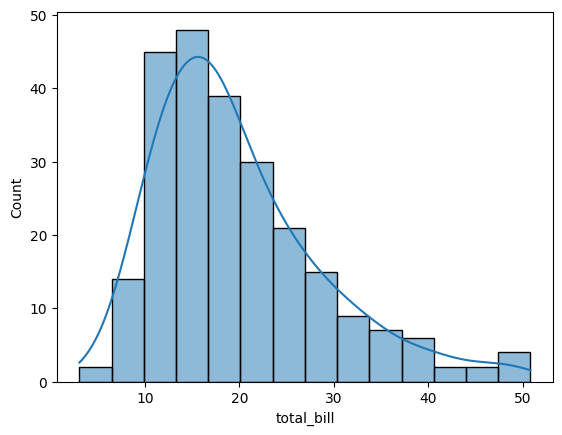

In [13]:
sns.histplot(data=df ,x='total_bill', kde=True)

# shapiro wilk Test on Normal Distribution Gaussian Distribution
# Null Hypothesis: The data is normally distributed.
# Alternative Hypothesis: Data is not normally distributed.

In [16]:
# shapiro Wilk Test 
statistic, p = stats.shapiro(df['total_bill'])

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 3.3244529351605934e-10, Sample does not look Gaussian/Normally Distributed (reject H0)


<Axes: xlabel='tip', ylabel='Count'>

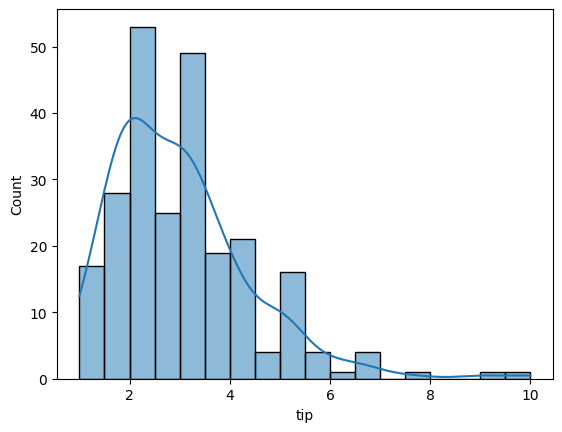

In [17]:
sns.histplot(data=df ,x='tip', kde=True)

In [18]:
# shapiro Wilk Test 
statistic, p = stats.shapiro(df['tip'])

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 8.200817629144819e-12, Sample does not look Gaussian/Normally Distributed (reject H0)


# Kolmogorov-Smirnov test

In [19]:
# Perform the Kolmogorov-Smirnov test
statistic, p = stats.kstest(df['tip'], 'norm')

# Print the results using if-else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 2.500004286381358e-221, Sample does not look Gaussian/Normally Distributed (reject H0)
